In [1]:
import os
import sys
# Adding the notebook directory to the sys path
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
root = os.path.dirname(notebook_dir)
sys.path.append(os.path.join(root))
import numpy as np
from src.decision import Decision
from src.outcome import Outcome
from src.event import Event
from src.decision_evaluation import evaluate_decision
from src.visualization import plot_distribution, plot_distribution_event, plot_utility_distribution_outcome
from src.utils import verify_probability_distribution

In [2]:
# Define probabilistic events
event1 = Event("Good Weather", "normal", {'mean': 0.7, 'std': 0.1}, lambda x :-20*x)
event2 = Event("Affordable Prices", "uniform", {'start': 0.5, 'end': 0.8}, lambda x : x*10)
event3 = Event("Interesting Activities", "binomial", {'n': 10, 'p': 0.6}, lambda x : x)

In [3]:
# Define outcomes
outcome1 = Outcome("Beach Vacation", "Vacation Destination", [event1, event2], lambda x, y: x * y)




In [4]:
print(outcome1.samples[:10])
print(event1.samples[:10])
print(event2.samples[:10])
print(np.max(outcome1.samples))
print(np.sum(outcome1.samples))
print(len(outcome1.samples))
print([e1*e2-o1 for e1, e2, o1 in zip(event1.samples[:10], event2.samples[:10], outcome1.samples[:10])])

[0.46871367 0.45841502 0.3886829  0.35954602 0.41572429 0.38125812
 0.43271221 0.40683482 0.44990713 0.42115197]
[0.74022599 0.58460542 0.66971173 0.57443593 0.56777101 0.65813486
 0.72671161 0.64370309 0.64621397 0.5575181 ]
[0.63320347 0.78414432 0.58037344 0.62591144 0.73220415 0.5793009
 0.59543869 0.63202247 0.69622006 0.75540501]
0.7985043393598549
4558.755809928303
10000
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


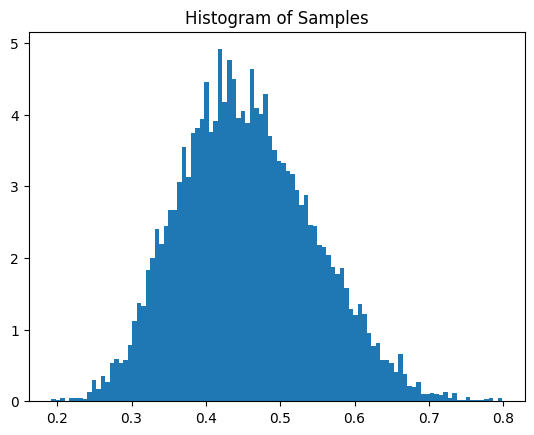

Total probability is approximately: 1.0


In [5]:
# Example usage with samples from an event
total_prob = verify_probability_distribution(outcome1.samples)
print(f"Total probability is approximately: {total_prob}")

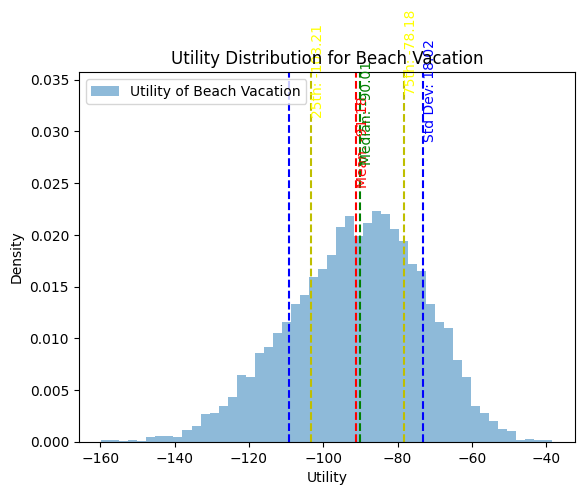

Statistics for Utility of Beach Vacation:
  Mean: -91.18
  Median: -90.01
  Standard Deviation: 18.02
  25th percentile: -103.21
  75th percentile: -78.18


In [6]:
# Plot utility distributions for each outcome
plot_utility_distribution_outcome(outcome1)
